<a href="https://colab.research.google.com/github/kashmafia/STROKE-PREDICTION/blob/main/AIFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stroke Prediction: A Classification Problem**

# Setup

Import Libraries

In [ ]:
import io
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Define Functions

In [ ]:
#define functions
def conf_matr(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred).ravel()
  TN, FP, FN, TP = cm
  return f'True Negatives: {TN}; True Positives: {TP};\nFalse Negatives: {FN}; False Positives: {FP}'

# Data Management

In [ ]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
strokes = stroke.drop('id', axis=1)
# Drop the ID column

In [ ]:
strokes.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
strokes['bmi'].fillna(strokes['bmi'].mean(), inplace = True)
# Fill in null bmi with the mean value of the others

strokes = pd.get_dummies(strokes, columns=['ever_married'], drop_first=True)
strokes.replace(to_replace=['Male', 'Female', 'Other', 'never smoked', 'formerly smoked', 'smokes', 'Unknown', 'Urban', 'Rural', 'Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], value=[0, 1, 2, 0, 1, 2, 3, 0, 1, 0, 1, 2, 3, 4], inplace = True)
#Replaced strings for clarity:
#Gender: Male=0, Female=1, Other=2
#Smoking Status: Never Smoked=0, Formerly Smoked=1, Smokes=2, Unknown=3
#Residence Type: Urban=0, Rural=1
#Work Type: Private=0, Self-employed=1, Govt_job=2, children=3, Never_worked=4
strokes.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes
0,0,67.0,0,1,0,0,228.69,36.600000,1,1,1
1,1,61.0,0,0,1,1,202.21,28.893237,0,1,1
2,0,80.0,0,1,0,1,105.92,32.500000,0,1,1
3,1,49.0,0,0,0,0,171.23,34.400000,2,1,1
4,1,79.0,1,0,1,1,174.12,24.000000,0,1,1


In [ ]:
# Splitting dataset into train and test data
strokes_y = strokes[['stroke']]
del strokes['stroke']
x_train, x_test, y_train, y_test = train_test_split(strokes, strokes_y, test_size=0.2, shuffle=True)
print(strokes_y)

      stroke
0          1
1          1
2          1
3          1
4          1
...      ...
5105       0
5106       0
5107       0
5108       0
5109       0

[5110 rows x 1 columns]


# Support Vector Machine

Define Hyperparameters

In [ ]:
#Create dictionary for differeny hyperparameters
param_dict = { #For SVM, determine which kernel to use
    1: 'linear', #linear kernel takes considerably longer than other kernels
    2: 'poly',
    3: 'rbf',
    4: 'sigmoid'
}

#fix shape of target data to resolve warnings
y_train_temp = y_train.values.ravel()
y_test_temp = y_test.values.ravel()

Test Algorithm

In [ ]:
#Loops through different hyperparameters

#Keep track of scores
svm_scores = np.empty(4)
svm_times = np.empty(4)

#loop through hyperparams
for param in param_dict:
  #start process timer
  t0 = time.process_time()
  #create model
  classifier = SVC(kernel = param_dict.get(param))
  #fit model
  classifier.fit(x_train, y_train_temp)
  #use model to predict
  y_pred = classifier.predict(x_test)
  #end process timer
  t1 = time.process_time()
  #time taken to complete algorithm
  total_time = t1 - t0
  svm_times[param-1] = round(total_time, 4)
  #cross validate
  cv = cross_val_score(classifier, x_train, y_train_temp, cv=5)
  cv_score = np.sum(cv)/5
  #results
  print(f'SVM USING "{param_dict.get(param)}" KERNEL')
  print(f'Process Time: {total_time}')
  acc = accuracy_score(y_test_temp, y_pred)
  svm_scores[param-1] = round(acc*100,2)
  print(f'Cross Validation score: {cv_score}')
  print(f'Accuracy on test set: {acc}')
  cm_score = conf_matr(y_test, y_pred)
  print(f'Confusion Matrix:\n{cm_score}')
  print()

SVM USING "linear" KERNEL
Process Time: 70.74496062599997
Cross Validation score: 0.9513211014116288
Accuracy on test set: 0.9510763209393346
Confusion Matrix:
True Negatives: 972; True Positives: 0;
False Negatives: 50; False Positives: 0

SVM USING "poly" KERNEL
Process Time: 0.4027930600000218
Cross Validation score: 0.9513211014116288
Accuracy on test set: 0.9510763209393346
Confusion Matrix:
True Negatives: 972; True Positives: 0;
False Negatives: 50; False Positives: 0

SVM USING "rbf" KERNEL
Process Time: 0.13589478800008692
Cross Validation score: 0.9513211014116288
Accuracy on test set: 0.9510763209393346
Confusion Matrix:
True Negatives: 972; True Positives: 0;
False Negatives: 50; False Positives: 0

SVM USING "sigmoid" KERNEL
Process Time: 0.1403722340000968
Cross Validation score: 0.9513211014116288
Accuracy on test set: 0.9510763209393346
Confusion Matrix:
True Negatives: 972; True Positives: 0;
False Negatives: 50; False Positives: 0



# K-Nearest Neighbors

Define Hyperparameters

In [ ]:
param_dict = {
    1: [3, 'minkowski'], #3 neighbors, minkowski metric for distance
    2: [5, 'minkowski'], #5 neighbors, minkowski metric for distance
    3: [3, 'euclidean'], #3 neighbors, euclidean metric for distance
    4: [5, 'euclidean'], #5 neighbors, euclidean metric for distance
    5: [3, 'chebyshev'], #3 neighbors, chebyshev metric for distance
    6: [5, 'chebyshev'] # 5 neighbors, chebyshev metric for distance
}

Test Algorithm

In [ ]:
#Keep track of scores
knn_scores = np.empty(6)
knn_times = np.empty(6)

#loop through hyperparams
for param in param_dict:
  #start process timer
  t0 = time.process_time()
  #create model
  classifier = KNeighborsClassifier(n_neighbors=param_dict.get(param)[0], metric=param_dict.get(param)[1])
  #fit model
  classifier.fit(x_train, y_train_temp)
  #use model to predict
  y_pred = classifier.predict(x_test)
  #end process timer
  t1 = time.process_time()
  #time taken to complete algorithm
  total_time = t1 - t0
  knn_times[param-1] = round(total_time, 4)
  #cross validate
  cv = cross_val_score(classifier, x_train, y_train_temp, cv=5)
  cv_score = np.sum(cv)/5
  #results
  print(f'SVM USING "{param_dict.get(param)[1]}" KERNEL')
  print(f'Process Time: {total_time}')
  acc = accuracy_score(y_test_temp, y_pred)
  knn_scores[param-1] = round(acc*100,2)
  print(f'Cross Validation score: {cv_score}')
  print(f'Accuracy on test set: {acc}')
  cm_score = conf_matr(y_test, y_pred)
  print(f'Confusion Matrix:\n{cm_score}')
  print()

SVM USING "minkowski" KERNEL
Process Time: 0.04803344799984188
Cross Validation score: 0.9371335885058641
Accuracy on test set: 0.9393346379647749
Confusion Matrix:
True Negatives: 956; True Positives: 4;
False Negatives: 46; False Positives: 16

SVM USING "minkowski" KERNEL
Process Time: 0.05656202899990603
Cross Validation score: 0.9444718437362525
Accuracy on test set: 0.9442270058708415
Confusion Matrix:
True Negatives: 963; True Positives: 2;
False Negatives: 48; False Positives: 9

SVM USING "euclidean" KERNEL
Process Time: 0.04505509500017979
Cross Validation score: 0.9371335885058641
Accuracy on test set: 0.9393346379647749
Confusion Matrix:
True Negatives: 956; True Positives: 4;
False Negatives: 46; False Positives: 16

SVM USING "euclidean" KERNEL
Process Time: 0.04978444800008219
Cross Validation score: 0.9444718437362525
Accuracy on test set: 0.9442270058708415
Confusion Matrix:
True Negatives: 963; True Positives: 2;
False Negatives: 48; False Positives: 9

SVM USING "che

# Multi-Layer Perceptron

Define Hyperparameters

In [ ]:
#hidden layers sizes
#-100
#-200
#activation
#-relu
#-identity
#solver
#-adam
#-sgd
param_dict = {
    1: [100, 'relu', 'adam'],
    2: [100, 'identity', 'adam'],
    3: [100, 'relu', 'sgd'],
    4: [100, 'identity', 'sgd'],
    5: [200, 'relu', 'adam'],
    6: [200, 'identity', 'adam'],
    7: [200, 'relu', 'sgd'],
    8: [200, 'identity', 'sgd']
}

Test Algorithm

In [ ]:
mlp_times = np.empty(8)
mlp_scores = np.empty(8)

for param in param_dict:
  #start process t0
  t0 = time.process_time()
  #create model
  classifier = MLPClassifier(hidden_layer_sizes=param_dict.get(param)[0], activation=param_dict.get(param)[1], solver=param_dict.get(param)[2])
  #fit model
  classifier.fit(x_train, y_train_temp)
  #use model to predict
  y_pred = classifier.predict(x_test)
  #end process timer
  t1 = time.process_time()
  #time taken to complete algorithm
  total_time = t1 - t0
  mlp_times[param-1] = round(total_time, 4)
  #results
  print(f'MLP USING "{param_dict.get(param)[0]}" HIDDEN LAYERS, "{param_dict.get(param)[1]}" activation, and "{param_dict.get(param)[2]}" solver.')
  print(f'Process Time: {total_time}')
  acc = accuracy_score(y_test_temp, y_pred)
  mlp_scores[param-1] = round(acc*100,2)
  print(f'Accuracy on test set: {acc}')
  cm_score = conf_matr(y_test, y_pred)
  print(f'Confusion Matrix:\n{cm_score}')
  print()

MLP USING "100" HIDDEN LAYERS, "relu" activation, and "adam" solver.
Process Time: 1.7255245519999995
Accuracy on test set: 0.9452054794520548
Confusion Matrix:
True Negatives: 966; True Positives: 0;
False Negatives: 56; False Positives: 0

MLP USING "100" HIDDEN LAYERS, "identity" activation, and "adam" solver.
Process Time: 2.6369615039999985
Accuracy on test set: 0.9001956947162426
Confusion Matrix:
True Negatives: 897; True Positives: 23;
False Negatives: 33; False Positives: 69

MLP USING "100" HIDDEN LAYERS, "relu" activation, and "sgd" solver.
Process Time: 1.1734871980000001
Accuracy on test set: 0.9452054794520548
Confusion Matrix:
True Negatives: 966; True Positives: 0;
False Negatives: 56; False Positives: 0

MLP USING "100" HIDDEN LAYERS, "identity" activation, and "sgd" solver.
Process Time: 0.6856534789999991
Accuracy on test set: 0.9452054794520548
Confusion Matrix:
True Negatives: 966; True Positives: 0;
False Negatives: 56; False Positives: 0

MLP USING "200" HIDDEN L

# Results

Setup Visualization

In [ ]:
#setup labels
svm_labels = (
              'SVM, Linear Kernel',
              'SVM, Poly Kernel',
              'SVM, RBF Kernel',
              'SVM, Sigmoid Kernel'
)
knn_labels = (
              'KNN, 3 neighbors, minkowski',
              'KNN, 5 neighbors, minkowski',
              'KNN, 3 neighbors, euclidean',
              'KNN, 5 neighbors, euclidean',
              'KNN, 3 neighbors, chebyshev',
              'KNN, 5 neighbors, chebyshev'
)
mlp_labels = (
    '100 hidden layers, relu activation, adam solver',
    '100 hidden layers, identity activation, adam solver',
    '100 hidden layers, relu activation, sgd solver',
    '100 hidden layers, identity activation, sgd solver',
    '200 hidden layers, relu activation, adam solver',
    '200 hidden layers, identity activation, adam solver',
    '200 hidden layers, relu activation, sgd solver',
    '200 hidden layers, identity activation, sgd solver'
)

#determine position of each label on chart
svm_pos = np.arange(len(svm_labels))
knn_pos = np.arange(len(knn_labels))
mlp_pos = np.arange(len(mlp_labels))

Visualize SVM scores

[93.93 94.42 93.93 94.42 94.32 94.23]


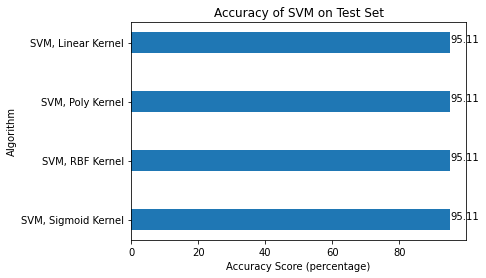

In [ ]:
#setup chart
fig, ax = plt.subplots()

#chart scores
ax.barh(svm_pos, svm_scores, 0.35, label='Algorithm')
#display values on bars
for i, val in enumerate(svm_scores):
  plt.text(val, i, str(val))
#set position of labels
ax.set_yticks(svm_pos)
#label each bar
ax.set_yticklabels(svm_labels)
#invert labels
ax.invert_yaxis()
#set x-axis label
ax.set_xlabel('Accuracy Score (percentage)')
#set y-axis label
ax.set_ylabel('Algorithm')
#set title of chart
ax.set_title('Accuracy of SVM on Test Set')

plt.show()

Visualize SVM process time

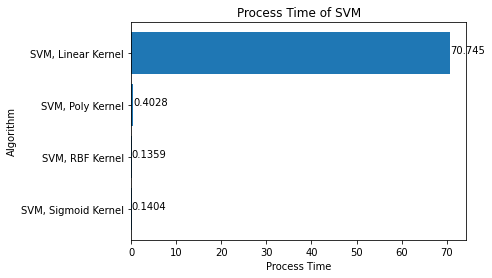

In [ ]:
#setup chart
fig, ax = plt.subplots()

#chart scores
ax.barh(svm_pos, svm_times)
#display values on bars
for i, val in enumerate(svm_times):
  plt.text(val, i, str(val))
#set position of labels
ax.set_yticks(svm_pos)
#label each bar
ax.set_yticklabels(svm_labels)
#invert labels
ax.invert_yaxis()
#set x-axis label
ax.set_xlabel('Process Time')
#set y-axis label
ax.set_ylabel('Algorithm')
#set title of chart
ax.set_title('Process Time of SVM')

plt.show()

Visualize KNN scores

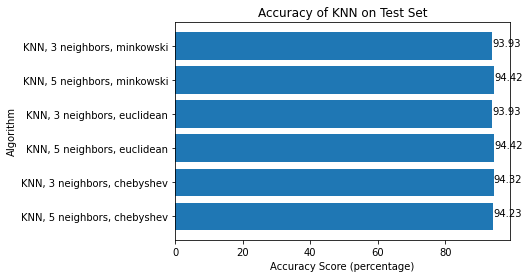

In [ ]:
#setup chart
fig, ax = plt.subplots()

#chart scores
ax.barh(knn_pos, knn_scores)
#display values on bars
for i, val in enumerate(knn_scores):
  plt.text(val, i, str(val))
#set position of labels
ax.set_yticks(knn_pos)
#label each bar
ax.set_yticklabels(knn_labels)
#invert labels
ax.invert_yaxis()
#set x-axis label
ax.set_xlabel('Accuracy Score (percentage)')
#set y-axis label
ax.set_ylabel('Algorithm')
#set title of chart
ax.set_title('Accuracy of KNN on Test Set')

plt.show()

Visualize KNN process time

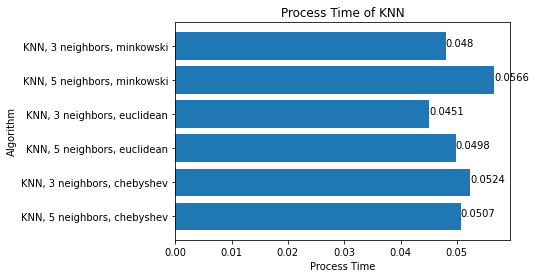

In [ ]:
#setup chart
fig, ax = plt.subplots()

#chart scores
ax.barh(knn_pos, knn_times)
#display values on bars
for i, val in enumerate(knn_times):
  plt.text(val, i, str(val))
#set position of labels
ax.set_yticks(knn_pos)
#label each bar
ax.set_yticklabels(knn_labels)
#invert labels
ax.invert_yaxis()
#set x-axis label
ax.set_xlabel('Process Time')
#set y-axis label
ax.set_ylabel('Algorithm')
#set title of chart
ax.set_title('Process Time of KNN')

plt.show()

Visualize MLP scores

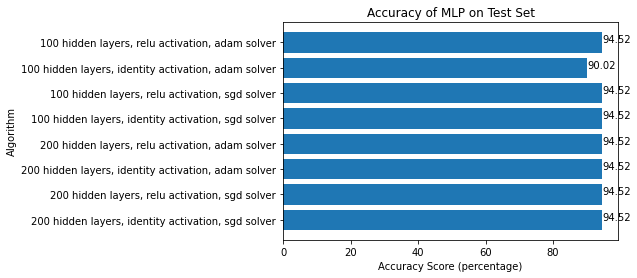

In [ ]:
#setup chart
fig, ax = plt.subplots()

#chart scores
ax.barh(mlp_pos, mlp_scores)
#display values on bars
for i, val in enumerate(mlp_scores):
  plt.text(val, i, str(val))
#set position of labels
ax.set_yticks(mlp_pos)
#label each bar
ax.set_yticklabels(mlp_labels)
#invert labels
ax.invert_yaxis()
#set x-axis label
ax.set_xlabel('Accuracy Score (percentage)')
#set y-axis label
ax.set_ylabel('Algorithm')
#set title of chart
ax.set_title('Accuracy of MLP on Test Set')

plt.show()

Visualzie MLP Process Times

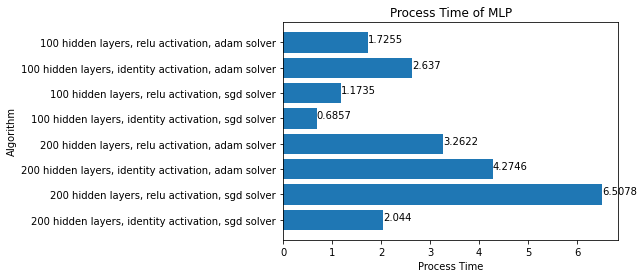

In [ ]:
#setup chart
fig, ax = plt.subplots()

#chart scores
ax.barh(mlp_pos, mlp_times)
#display values on bars
for i, val in enumerate(mlp_times):
  plt.text(val, i, str(val))
#set position of labels
ax.set_yticks(mlp_pos)
#label each bar
ax.set_yticklabels(mlp_labels)
#invert labels
ax.invert_yaxis()
#set x-axis label
ax.set_xlabel('Process Time')
#set y-axis label
ax.set_ylabel('Algorithm')
#set title of chart
ax.set_title('Process Time of MLP')

plt.show()